In [1]:
# import Class
from classy import Class
import numpy as np
# to get plots displayed in notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

In [2]:
# set some common instructions
# I copied them from test_lcdm and test_dmeff files
par = {}
par['recombination'] = 'recfast'
par['gauge'] = 'synchronous'
par['write thermodynamics'] = 'yes'
par['write background'] = 'yes'
par['lensing'] = 'yes'
par['output'] = 'tCl, lCl, pCl,mPk'
par['omega_b'] = 0.02218
par['h'] = 0.67
par['tau_reio'] = 0.07
par['ln10^{10}A_s'] = 3.056
par['n_s'] = 0.9619
par['tight_coupling_trigger_tau_c_over_tau_h'] = 0.0
par['tight_coupling_trigger_tau_c_over_tau_k'] = 0.0
par['k_per_decade_for_pk'] = 100
par['P_k_max_h/Mpc'] = 5

In [3]:
# common parameters for DMEFF
par1={}
par1['dmeff_baryon_heat_exchange'] = 'yes'
par1['dmeff_backrection_on_baryons'] = 'no'
par1['calculation_a_la_dvorkin_et_al'] = 'no'
par1['Vrel_dmeff_rate'] = 30
par1['dmeff_Vrms_dynamic'] = 'yes'
par1['dmeff_Vfull_dynamic'] = 'no'
par1['dmeff_niter_dynamic_max'] = 10
par1['Vrms_convergence_tol'] = 1e-3
par1['dmeff_interacting_species'] = 'hydrogen'
par1['Tracy_and_Cora_Helium'] = 'no'
par1['z_rate_off_dmeff'] = 0
par1['sigma_dmeff_security'] = 'yes'
par1['input_verbose'] = 1
par1['background_verbose'] = 1
par1['thermodynamics_verbose'] = 1
par1['perturbations_verbose'] = 1
par1['transfer_verbose'] = 1
par1['primordial_verbose'] = 1
par1['spectra_verbose'] = 1
par1['nonlinear_verbose'] = 1
par1['lensing_verbose'] = 1
par1['output_verbose'] = 1

par2 = {}
par2['calculation_a_la_dvorkin_et_al'] = 'yes'
par2['Vrel_dmeff_rate'] = 30
par2['dmeff_Vrms_dynamic'] = 'no'
par2['dmeff_Vfull_dynamic'] = 'no'

In [4]:
# for IDM with n = 2
dmeff2 = Class()
dmeff2.struct_cleanup()
dmeff2.set(par)
dmeff2.set(par2)
dmeff2.set({"omega_cdm":1.0e-15})
dmeff2.set({"omega_dmeff":0.1205,"m_dmeff":1.0, "sigma_dmeff":5.4e-19, "npow_dmeff":2})
dmeff2.compute()

In [5]:
# Next, compute all models without HALOFIT

# LCDM
lcdm = Class()
lcdm.struct_cleanup()
lcdm.set(par)
lcdm.set({"omega_cdm":0.1205})
lcdm.compute()

# for IDM with n = 0
dmeff0 = Class()
dmeff0.struct_cleanup()
dmeff0.set(par)
dmeff0.set(par2)
dmeff0.set({"omega_cdm":1.0e-15})
dmeff0.set({"omega_dmeff":0.1205,"m_dmeff":1.0, "sigma_dmeff":5.1e-26, "npow_dmeff":0})
dmeff0.compute()

# for IDM with n = 2
dmeff2 = Class()
dmeff2.struct_cleanup()
dmeff2.set(par)
dmeff2.set(par2)
dmeff2.set({"omega_cdm":1.0e-15})
dmeff2.set({"omega_dmeff":0.1205,"m_dmeff":1.0, "sigma_dmeff":5.4e-19, "npow_dmeff":2})
dmeff2.compute()

# for IDM with n = -2
dmeff_2 = Class()
dmeff_2.struct_cleanup()
dmeff_2.set(par)
dmeff_2.set(par2)
dmeff_2.set({"omega_cdm":1.0e-15})
dmeff_2.set({"omega_dmeff":0.1205,"m_dmeff":1.0, "sigma_dmeff":1.0e-32, "npow_dmeff":-2})
dmeff_2.compute()



In [6]:
# Next, get all data points for models without HALOFIT

kk_st = np.logspace(-4,np.log10(3),1000)

# check LCDM model
Pk_lcdm = []
ll_lcdm = lcdm.lensed_cl()['ell'][2:]
clTT_lcdm = lcdm.lensed_cl()['tt'][2:]
clPP_lcdm = lcdm.lensed_cl()['pp'][2:]
# check Dmeff model w/ n= 0
Pk_dmeff_0 = []
ll_dmeff_0 = dmeff0.lensed_cl()['ell'][2:]
clTT_dmeff_0 = dmeff0.lensed_cl()['tt'][2:]
clPP_dmeff_0 = dmeff0.lensed_cl()['pp'][2:]
# check Dmeff model w/ n= 2
Pk_dmeff_2 = []
ll_dmeff_2 = dmeff2.lensed_cl()['ell'][2:]
clTT_dmeff_2 = dmeff2.lensed_cl()['tt'][2:]
clPP_dmeff_2 = dmeff2.lensed_cl()['pp'][2:]
# check Dmeff model w/ n= -2
Pk_dmeff__2 = []
ll_dmeff__2 = dmeff_2.lensed_cl()['ell'][2:]
clTT_dmeff__2 = dmeff_2.lensed_cl()['tt'][2:]
clPP_dmeff__2 = dmeff_2.lensed_cl()['pp'][2:]
# get Pk
for k in kk_st:
    Pk_lcdm.append(lcdm.pk(k,0.))
    Pk_dmeff_0.append(dmeff0.pk(k,0.))
    Pk_dmeff_2.append(dmeff2.pk(k,0.))
    Pk_dmeff__2.append(dmeff_2.pk(k,0.))

Pk_lcdm = np.array(Pk_lcdm)
Pk_dmeff_0 = np.array(Pk_dmeff_0)
Pk_dmeff_2 = np.array(Pk_dmeff_2)
Pk_dmeff__2 = np.array(Pk_dmeff__2)



In [7]:
# Next, compute all models with HALOFIT

# LCDM
lcdm_h = Class()
lcdm_h.struct_cleanup()
lcdm_h.set(par)
lcdm_h.set({"omega_cdm":0.1205})
lcdm_h.set({"non linear":"halofit"})
lcdm_h.compute()

# for IDM with n = 0
dmeff0_h = Class()
dmeff0_h.struct_cleanup()
dmeff0_h.set(par)
dmeff0_h.set(par2)
dmeff0_h.set({"omega_cdm":1.0e-15})
dmeff0_h.set({"omega_dmeff":0.1205,"m_dmeff":1.0, "sigma_dmeff":5.1e-26, "npow_dmeff":0})
dmeff0_h.set({"non linear":"halofit"})
dmeff0_h.compute()

# for IDM with n = 2
dmeff2_h = Class()
dmeff2_h.struct_cleanup()
dmeff2_h.set(par)
dmeff2_h.set(par2)
dmeff2_h.set({"omega_cdm":1.0e-15})
dmeff2_h.set({"omega_dmeff":0.1205,"m_dmeff":1.0, "sigma_dmeff":5.4e-19, "npow_dmeff":2})
dmeff2_h.set({"non linear":"halofit"})
dmeff2_h.compute()

# for IDM with n = -2
dmeff_2_h = Class()
dmeff_2_h.struct_cleanup()
dmeff_2_h.set(par)
dmeff_2_h.set(par2)
dmeff_2_h.set({"omega_cdm":1.0e-15})
dmeff_2_h.set({"omega_dmeff":0.1205,"m_dmeff":1.0, "sigma_dmeff":1.0e-32, "npow_dmeff":-2})
dmeff_2_h.set({"non linear":"halofit"})
dmeff_2_h.compute()




In [8]:
# Next, get all data points for models with HALOFIT

kk_st = np.logspace(-4,np.log10(3),1000)

# check LCDM model
Pk_lcdm_h = []
ll_lcdm_h = lcdm_h.lensed_cl()['ell'][2:]
clTT_lcdm_h = lcdm_h.lensed_cl()['tt'][2:]
clPP_lcdm_h = lcdm_h.lensed_cl()['pp'][2:]
# check Dmeff model w/ n= 0
Pk_dmeff_0_h = []
ll_dmeff_0_h = dmeff0_h.lensed_cl()['ell'][2:]
clTT_dmeff_0_h = dmeff0_h.lensed_cl()['tt'][2:]
clPP_dmeff_0_h = dmeff0_h.lensed_cl()['pp'][2:]
# check Dmeff model w/ n= 2
Pk_dmeff_2_h = []
ll_dmeff_2_h = dmeff2_h.lensed_cl()['ell'][2:]
clTT_dmeff_2_h = dmeff2_h.lensed_cl()['tt'][2:]
clPP_dmeff_2_h = dmeff2_h.lensed_cl()['pp'][2:]
# check Dmeff model w/ n= -2
Pk_dmeff__2_h = []
ll_dmeff__2_h = dmeff_2_h.lensed_cl()['ell'][2:]
clTT_dmeff__2_h = dmeff_2_h.lensed_cl()['tt'][2:]
clPP_dmeff__2_h = dmeff_2_h.lensed_cl()['pp'][2:]

# get Pk
for k in kk_st:
    Pk_lcdm_h.append(lcdm_h.pk(k,0.))
    Pk_dmeff_0_h.append(dmeff0_h.pk(k,0.))
    Pk_dmeff_2_h.append(dmeff2_h.pk(k,0.))
    Pk_dmeff__2_h.append(dmeff_2_h.pk(k,0.))

Pk_lcdm_h = np.array(Pk_lcdm_h)
Pk_dmeff_0_h = np.array(Pk_dmeff_0_h)
Pk_dmeff_2_h = np.array(Pk_dmeff_2_h)
Pk_dmeff__2_h = np.array(Pk_dmeff__2_h)



In [9]:
# Get all Residuals
# get all the residuals
# first, NO HALOFIT
# residuals
res_clTT0 = (clTT_dmeff_0 - clTT_lcdm)/clTT_lcdm
res_clTT2 = (clTT_dmeff_2 - clTT_lcdm)/clTT_lcdm
res_clTT_2 = (clTT_dmeff__2 - clTT_lcdm)/clTT_lcdm

res_clPP0 = (clPP_dmeff_0 - clPP_lcdm)/clPP_lcdm
res_clPP2 = (clPP_dmeff_2 - clPP_lcdm)/clPP_lcdm
res_clPP_2 = (clPP_dmeff__2 - clPP_lcdm)/clPP_lcdm

res_Pk0 = (Pk_dmeff_0 - Pk_lcdm)/Pk_lcdm
res_Pk2 = (Pk_dmeff_2 - Pk_lcdm)/Pk_lcdm
res_Pk_2 = (Pk_dmeff__2 - Pk_lcdm)/Pk_lcdm

# WITH HALOFIT
# residuals
res_clTT0_h = (clTT_dmeff_0_h - clTT_lcdm_h)/clTT_lcdm_h
res_clTT2_h = (clTT_dmeff_2_h - clTT_lcdm_h)/clTT_lcdm_h
res_clTT_2_h = (clTT_dmeff__2 - clTT_lcdm_h)/clTT_lcdm_h

res_clPP0_h = (clPP_dmeff_0_h - clPP_lcdm_h)/clPP_lcdm_h
res_clPP2_h = (clPP_dmeff_2_h - clPP_lcdm_h)/clPP_lcdm_h
res_clPP_2_h = (clPP_dmeff__2_h - clPP_lcdm_h)/clPP_lcdm_h

res_Pk0_h = (Pk_dmeff_0_h - Pk_lcdm_h)/Pk_lcdm_h
res_Pk2_h = (Pk_dmeff_2_h - Pk_lcdm_h)/Pk_lcdm_h
res_Pk_2_h = (Pk_dmeff__2_h - Pk_lcdm_h)/Pk_lcdm_h

<IPython.core.display.Javascript object>


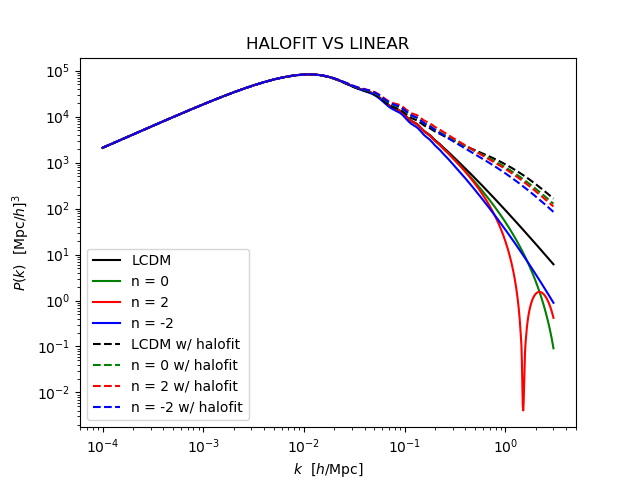

In [10]:
# plots all Pk spectra
#plot HALOFIT VS NO HALOFIT Pk
plt.figure()
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_st,Pk_lcdm,'k-', label = "LCDM")
plt.plot(kk_st,Pk_dmeff_0,'g-', label = 'n = 0')
plt.plot(kk_st,Pk_dmeff_2,'r-', label = 'n = 2')
plt.plot(kk_st,Pk_dmeff__2,'b-', label = 'n = -2')
plt.plot(kk_st,Pk_lcdm_h,'k--', label = "LCDM w/ halofit")
plt.plot(kk_st,Pk_dmeff_0_h,'g--', label = 'n = 0 w/ halofit')
plt.plot(kk_st,Pk_dmeff_2_h,'r--', label = 'n = 2 w/ halofit')
plt.plot(kk_st,Pk_dmeff__2_h,'b--', label = 'n = -2 w/ halofit')
plt.legend(loc = "lower left")
plt.title("HALOFIT VS LINEAR")
plt.show()

<IPython.core.display.Javascript object>


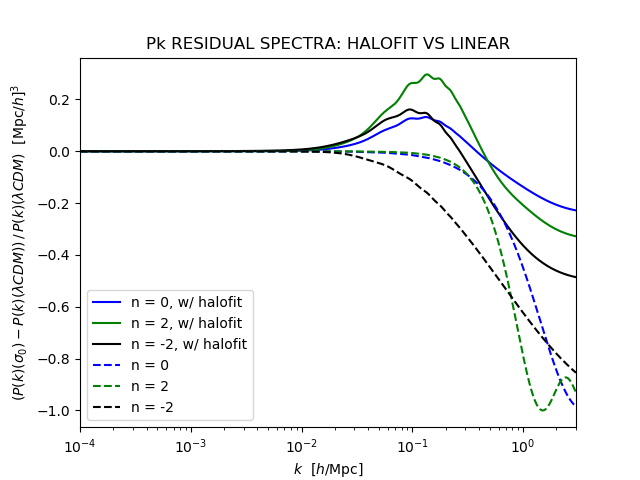

In [11]:
#plot Pk 
plt.figure()
plt.xscale('log');plt.yscale('linear');plt.xlim(kk_st[0],kk_st[-1]) # the region where Pk starts to diverge noticeably - can change to [0] to [-1]
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$(P(k)(\sigma_0) - P(k)(\lambda CDM))\,/\, P(k)(\lambda CDM)  \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_st,res_Pk0_h,'b-', label = "n = 0, w/ halofit")
plt.plot(kk_st,res_Pk2_h,'g-', label = "n = 2, w/ halofit")
plt.plot(kk_st,res_Pk_2_h,'k-', label = "n = -2, w/ halofit")
plt.plot(kk_st,res_Pk0,'b--', label = "n = 0")
plt.plot(kk_st,res_Pk2,'g--', label = "n = 2")
plt.plot(kk_st,res_Pk_2,'k--', label = "n = -2")
plt.title("Pk RESIDUAL SPECTRA: HALOFIT VS LINEAR")
plt.legend(loc ="lower left")
plt.show()

<IPython.core.display.Javascript object>


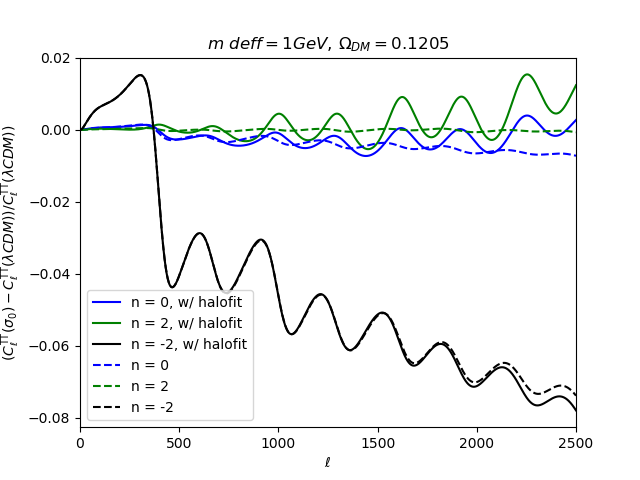

<IPython.core.display.Javascript object>


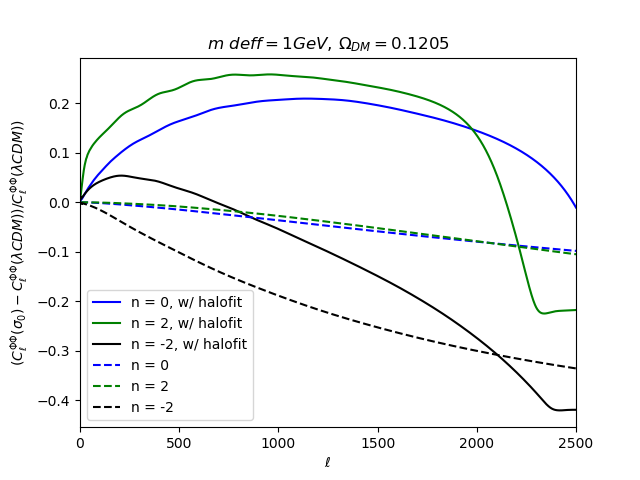

In [12]:
# plot the residuals
# plot C_l^TT residual power spectra HALOFIT VS LINEAR 
plt.figure()
plt.xscale('linear');plt.yscale('linear');plt.xlim(0,2500)
plt.title(r"$m \ deff = 1 GeV,\, \Omega_{DM} = 0.1205$")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ (C_\ell^\mathrm{TT}(\sigma_0) - C_\ell^\mathrm{TT}(\lambda CDM))/C_\ell^\mathrm{TT}(\lambda CDM))$')
plt.plot(ll_lcdm_h,res_clTT0_h,'b-', label = "n = 0, w/ halofit")
plt.plot(ll_lcdm_h,res_clTT2_h,'g-', label = "n = 2, w/ halofit")
plt.plot(ll_lcdm_h,res_clTT_2_h,'k-', label = "n = -2, w/ halofit")
plt.plot(ll_lcdm,res_clTT0,'b--', label = "n = 0")
plt.plot(ll_lcdm,res_clTT2,'g--', label = "n = 2")
plt.plot(ll_lcdm,res_clTT_2,'k--', label = "n = -2")
plt.legend(loc ="lower left")
plt.show()
    
# plot C_l^PP residual power spectra HALOFIT VS LINEAR
plt.figure()
plt.xscale('linear');plt.yscale('linear');plt.xlim(0,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ (C_\ell^\mathrm{\Phi\Phi}(\sigma_0) - C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))/C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))$')
plt.plot(ll_lcdm_h,res_clPP0_h,'b-', label = "n = 0, w/ halofit")
plt.plot(ll_lcdm_h,res_clPP2_h,'g-', label = "n = 2, w/ halofit")
plt.plot(ll_lcdm_h,res_clPP_2_h,'k-', label = "n = -2, w/ halofit")
plt.plot(ll_lcdm,res_clPP0,'b--', label = "n = 0")
plt.plot(ll_lcdm,res_clPP2,'g--', label = "n = 2")
plt.plot(ll_lcdm,res_clPP_2,'k--', label = "n = -2")

plt.legend(loc ="lower left")
plt.title(r"$m \ deff = 1 GeV,\, \Omega_{DM} = 0.1205$")
plt.show()


Next, we add corrections from the 1loop_dm_reference_modified.py


In [22]:
from codex import pk_nonlinear as pk


In [23]:
kk, Pk = pk(kk_st, Pk_lcdm)
kk1, Pk1 = pk(kk_st, Pk_dmeff_0)
kk2, Pk2 = pk(kk_st, Pk_dmeff_2)
kk3, Pk3 = pk(kk_st, Pk_dmeff__2)

/usr/licensed/anaconda3/5.2.0/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [28]:
len(Pk_lcdm)

1000

In [25]:
# now get spectra with EFT CORRECTIONS

# we want to add Pk to lcdm values which correspond to particular kk values
# so we need to interpolte lcdm values for those particular values of kk
lcdm_interp = np.interp(kk, kk_st, Pk_lcdm)
lcdm_new = Pk + lcdm_interp

# same interpolation with dmeff sets
dmeff0_interp = np.interp(kk1, kk_st, Pk_dmeff_0)
dmeff0_new = Pk1 + dmeff0_interp

dmeff2_interp = np.interp(kk2, kk_st, Pk_dmeff_2)
dmeff2_new = Pk2 + dmeff2_interp

dmeff_2_interp = np.interp(kk3, kk_st, Pk_dmeff__2)
dmeff_2_new = Pk3 + dmeff_2_interp

# calculate all residuals from EFT
res_1 = (dmeff0_new - lcdm_new)/lcdm_new
res_2 = (dmeff2_new - lcdm_new)/lcdm_new
res_3 = (dmeff_2_new - lcdm_new)/lcdm_new


<IPython.core.display.Javascript object>


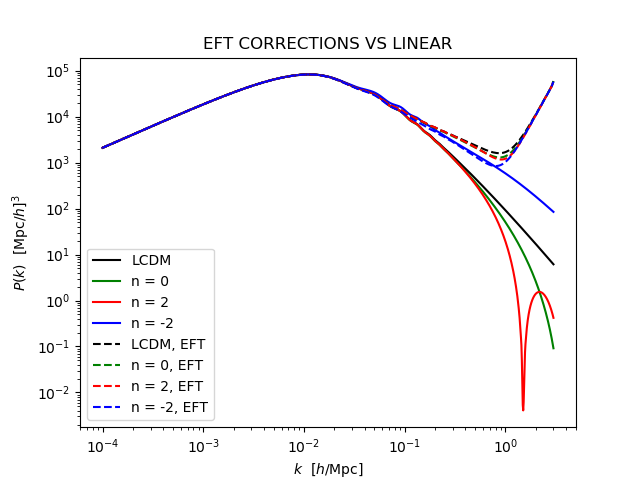

In [26]:
# Compare Pk plots of linear models and models with new EFT corrections
plt.figure()
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_st,Pk_lcdm,'k-', label = "LCDM")
plt.plot(kk_st,Pk_dmeff_0,'g-', label = 'n = 0')
plt.plot(kk_st,Pk_dmeff_2,'r-', label = 'n = 2')
plt.plot(kk_st,Pk_dmeff__2_h,'b-', label = 'n = -2')
plt.plot(kk, lcdm_new, 'k--',label = "LCDM, EFT")
plt.plot(kk1, dmeff0_new, 'g--',label = "n = 0, EFT")
plt.plot(kk2, dmeff2_new,'r--', label = "n = 2, EFT")
plt.plot(kk3, dmeff_2_new,'b--', label = "n = -2, EFT")


plt.legend(loc = "lower left")
plt.title("EFT CORRECTIONS VS LINEAR")
plt.show()

<IPython.core.display.Javascript object>


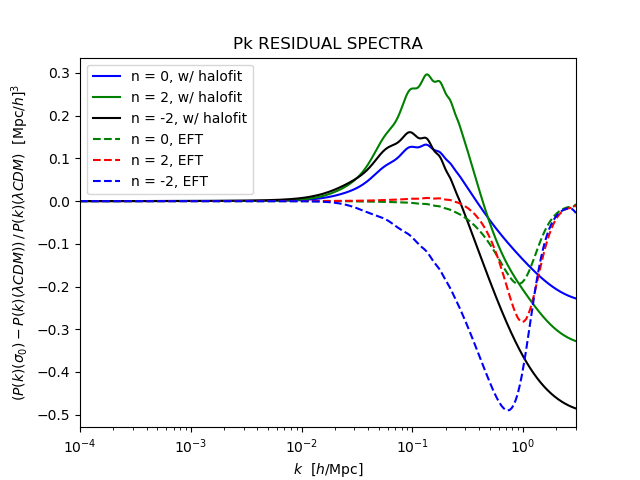

In [27]:
#plot Residual Pk spectra of HALOFIT models and models with EFT corrections
plt.figure()
plt.xscale('log');plt.yscale('linear');plt.xlim(kk[0],kk[-1]) # the region where Pk starts to diverge noticeably - can change to [0] to [-1]
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$(P(k)(\sigma_0) - P(k)(\lambda CDM))\,/\, P(k)(\lambda CDM)  \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_st,res_Pk0_h,'b-', label = "n = 0, w/ halofit")
plt.plot(kk_st,res_Pk2_h,'g-', label = "n = 2, w/ halofit")
plt.plot(kk_st,res_Pk_2_h,'k-', label = "n = -2, w/ halofit")
plt.plot(kk1, res_1, 'g--',label = "n = 0, EFT")
plt.plot(kk2, res_2,'r--', label = "n = 2, EFT")
plt.plot(kk3, res_3,'b--', label = "n = -2, EFT")
plt.title("Pk RESIDUAL SPECTRA")
plt.legend(loc ="upper left")
plt.show()

In [20]:
delta_max = 0.5 # maximum difference in y between two points
delta = 0 # running correction value
data_cor_2 = [] # we append two first points
kk_cor_2 = []
rng = len(dmeff_2_new)
diff = []
#kk_c

for i in range(1, rng-1): 
    delta_i = (dmeff_2_new[i] - dmeff_2_new[i-1])/dmeff_2_new[i-1]
    delta_ii = (dmeff_2_new[i+1] - dmeff_2_new[i])/dmeff_2_new[i]
    diff.append(delta_ii)
    if (np.abs(delta_ii) > delta_max) or (np.abs(delta_i) > delta_max):
        pass
    else:
        data_cor_2.append(dmeff_2_new[i])
        kk_cor_2.append(kk3[i])

data_cor_2.append(dmeff_2_new[-1])
kk_cor_2.append(kk3[-1])

#plt.figure()
#plt.xscale("log"); plt.yscale("log")
#plt.plot(kk_cor_2, data_cor_2, 'r--')
#plt.plot(kk3,dmeff_2_interp,'b--', label = 'n=-2')
#plt.show()

#plt.figure()
#plt.xscale("log"); plt.yscale("linear");#plt.xlim(6.e-1, 1.); #plt.ylim(-1, 2) 
#plt.plot(kk3[2:],diff,'b-', label = 'n=-2')
#plt.show()


In [21]:
delta_max = 0.25 # maximum difference in y between two points
delta = 0 # running correction value
data_cor0 = [] # we append two first points
kk_cor0 = []
rng = len(dmeff0_new)
diff0 = []

for i in range(1, rng-1): 
    delta_i = (dmeff0_new[i] - dmeff0_new[i-1])/dmeff0_new[i-1]
    delta_ii = (dmeff0_new[i+1] - dmeff0_new[i])/dmeff0_new[i]
    diff0.append(delta_ii)
    if (np.abs(delta_ii) > delta_max) or (np.abs(delta_i) > delta_max):
        pass
    else:
        data_cor0.append(dmeff0_new[i])
        kk_cor0.append(kk1[i])

data_cor0.append(dmeff0_new[-1])
kk_cor0.append(kk1[-1])

#plt.figure()
#plt.xscale("log"); plt.yscale("log")
#plt.plot(kk_cor0, data_cor0, 'r--')
#plt.plot(kk1,dmeff0_new,'b--', label = 'n=0')
#plt.show()

#plt.figure()
#plt.xscale("log"); plt.yscale("linear");plt.xlim(1.e-1, 5.e-1); plt.ylim(-1, 1) 
#plt.plot(kk1[2:],diff0,'b-', label = 'n=0')
#plt.show()

In [22]:
delta_max = 0.25 # maximum difference in y between two points
data_cor2 = [] 
kk_cor2 = []
rng = len(dmeff2_new)
diff2 = []

for i in range(1, rng-1): 
    delta_i = (dmeff2_new[i] - dmeff2_new[i-1])/dmeff2_new[i-1]
    delta_ii = (dmeff2_new[i+1] - dmeff2_new[i])/dmeff2_new[i]
    diff2.append(delta_ii)
    if (np.abs(delta_ii) > delta_max) or (np.abs(delta_i) > delta_max):
        pass
    else:
        data_cor2.append(dmeff2_new[i])
        kk_cor2.append(kk2[i])

data_cor2.append(dmeff2_new[-1])
kk_cor2.append(kk2[-1])

#plt.figure()
#plt.xscale("log"); plt.yscale("log")
#plt.plot(kk_cor2, data_cor2, 'r--')
#plt.plot(kk2,dmeff2_new,'b--', label = 'n=0')
#plt.show()

#plt.figure()
#plt.xscale("log"); plt.yscale("linear");#plt.xlim(1.e-1, 5.e-1); plt.ylim(-1, 1) 
#plt.plot(kk1[2:],diff2,'b-', label = 'n=0')
#plt.show()

In [23]:
delta_max = 0.25 # maximum difference in y between two points
data_cor = [] 
kk_cor = []
rng = len(lcdm_new)
diff = []

for i in range(1, rng-1): 
    delta_i = (lcdm_new[i] - lcdm_new[i-1])/lcdm_new[i-1]
    delta_ii = (lcdm_new[i+1] - lcdm_new[i])/lcdm_new[i]
    diff.append(delta_ii)
    if (np.abs(delta_ii) > delta_max) or (np.abs(delta_i) > delta_max):
        pass
    else:
        data_cor.append(lcdm_new[i])
        kk_cor.append(kk[i])

data_cor.append(lcdm_new[-1])
kk_cor.append(kk[-1])

#plt.figure()
#plt.xscale("log"); plt.yscale("log")
#plt.plot(kk_cor, data_cor, 'r--')
#plt.plot(kk,lcdm_new,'b--', label = 'n=0')
#plt.show()

#plt.figure()
#plt.xscale("log"); plt.yscale("linear");#plt.xlim(1.e-1, 5.e-1); plt.ylim(-1, 1) 
#plt.plot(kk[2:],diff,'b-', label = 'n=0')
#plt.show()

In [24]:
def remove_spikes(kk, data):
    delta_max = 0.25 # maximum difference in y between two points
    data_cor = [] 
    kk_cor = []
    rng = len(data)
    diff = []
    
    for i in range(1, rng-1): 
        delta_i = (data[i] - data[i-1])/data[i-1]
        delta_ii = (data[i+1] - data[i])/data[i]
        diff.append(delta_ii)
        if (np.abs(delta_ii) > delta_max) or (np.abs(delta_i) > delta_max):
            pass
        else:
            data_cor.append(data[i])
            kk_cor.append(kk[i])

    data_cor.append(data[-1])
    kk_cor.append(kk[-1])
    
    data_cor = np.array(data_cor)
    kk_cor = np.array(kk_cor)
    return kk_cor, data_cor
    

In [25]:
# get EFT data without spikes
kk_c, data_c = remove_spikes(kk, lcdm_new)
kk_c0, data_c0 = remove_spikes(kk1, dmeff0_new)
kk_c2, data_c2 = remove_spikes(kk2, dmeff2_new)
kk_c_2, data_c_2 = remove_spikes(kk3, dmeff_2_new)

In [26]:
# since arrays have different sizes 
# in order to calculate residuals
# we need to interpolate again
data0_interp = np.interp(kk_c0, kk_c, data_c)
data2_interp = np.interp(kk_c2, kk_c, data_c)
data_2_interp = np.interp(kk_c_2, kk_c, data_c)
dmeff_2_new = Pk3 + dmeff_2_interp
res_new1 = (data_c0-data0_interp)/data0_interp
res_new2 = (data_c2-data2_interp)/data2_interp
res_new3 = (data_c_2-data_2_interp)/data_2_interp 

<IPython.core.display.Javascript object>


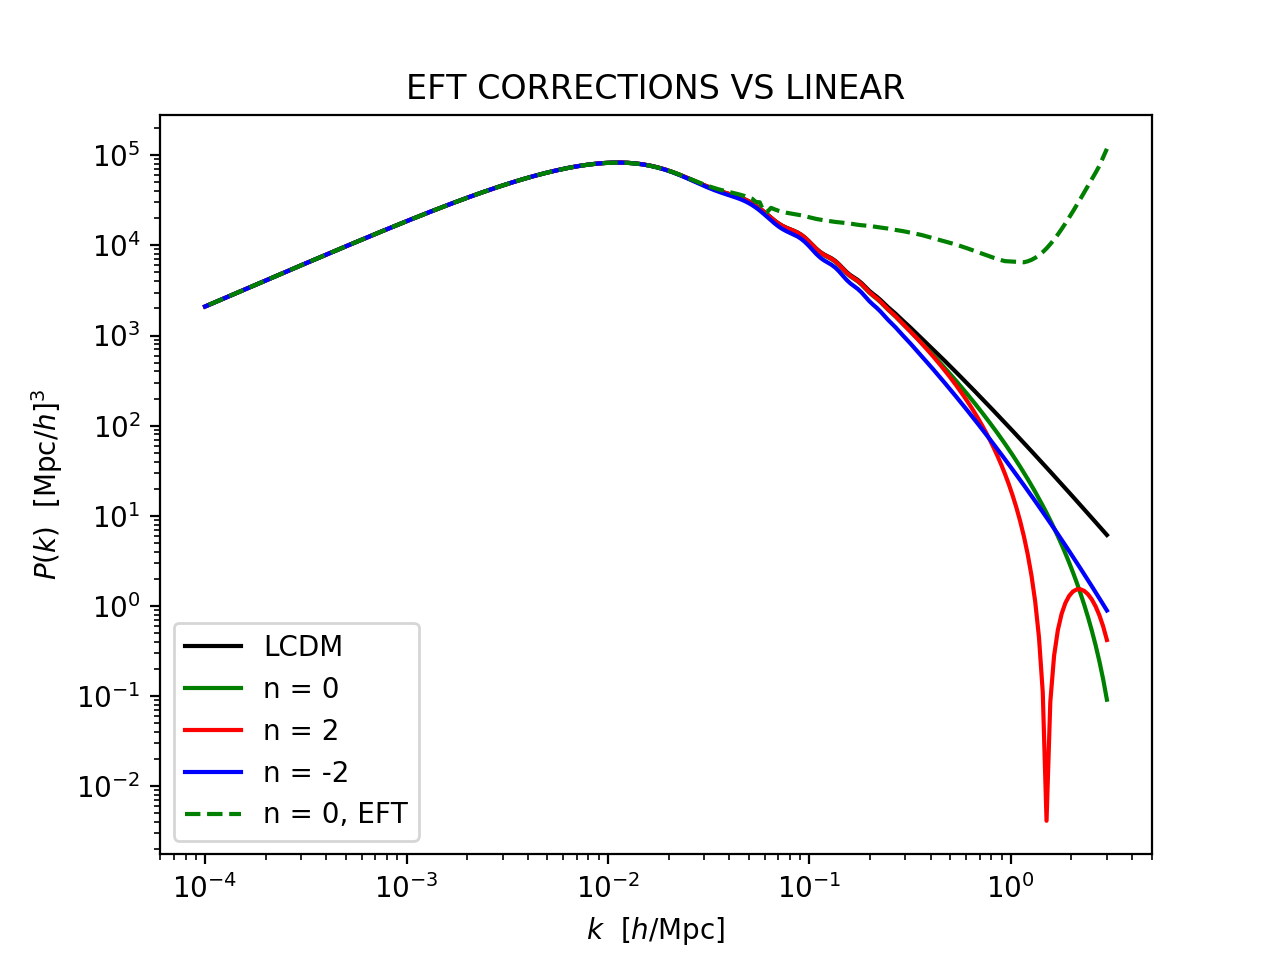

In [27]:
# Compare Pk plots of linear models and models with new EFT corrections
plt.figure()
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_st,Pk_lcdm,'k-', label = "LCDM")
plt.plot(kk_st,Pk_dmeff_0,'g-', label = 'n = 0')
plt.plot(kk_st,Pk_dmeff_2,'r-', label = 'n = 2')
plt.plot(kk_st,Pk_dmeff__2,'b-', label = 'n = -2')
#plt.plot(kk_cor, data_cor, 'k--',label = "LCDM, EFT")
#plt.plot(kk_cor0, data_cor0, 'g--',label = "n = 0, EFT")
#plt.plot(kk_cor2, data_cor2,'r--', label = "n = 2, EFT")
#plt.plot(kk_cor_2, data_cor_2,'b--', label = "n = -2, EFT")
#plt.plot(kk_c, data_c, 'k--',label = "LCDM, EFT")
plt.plot(kk_c0, data_c0, 'g--',label = "n = 0, EFT")
#plt.plot(kk_c2, data_c2,'r--', label = "n = 2, EFT")
#plt.plot(kk_c_2, data_c_2,'b--', label = "n = -2, EFT")


plt.legend(loc = "lower left")
plt.title("EFT CORRECTIONS VS LINEAR")
plt.show()

<IPython.core.display.Javascript object>


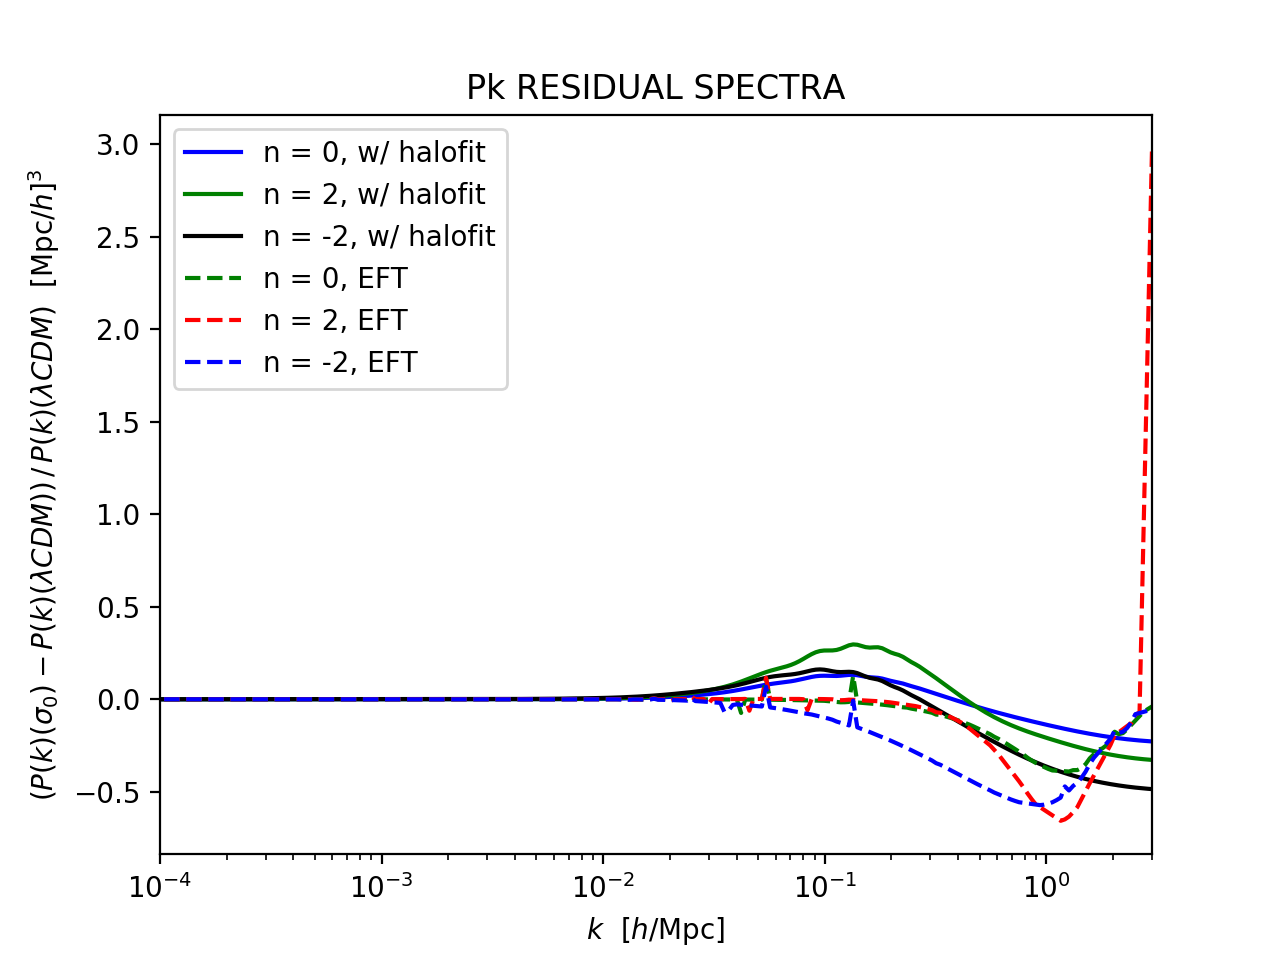

In [133]:
#plot Residual Pk spectra of HALOFIT models and models with EFT corrections
plt.figure()
plt.xscale('log');plt.yscale('linear');plt.xlim(kk[0],kk[-1]) # the region where Pk starts to diverge noticeably - can change to [0] to [-1]
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$(P(k)(\sigma_0) - P(k)(\lambda CDM))\,/\, P(k)(\lambda CDM)  \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_st,res_Pk0_h,'b-', label = "n = 0, w/ halofit")
plt.plot(kk_st,res_Pk2_h,'g-', label = "n = 2, w/ halofit")
plt.plot(kk_st,res_Pk_2_h,'k-', label = "n = -2, w/ halofit")
plt.plot(kk_c0, res_new1, 'g--',label = "n = 0, EFT")
plt.plot(kk_c2, res_new2,'r--', label = "n = 2, EFT")
plt.plot(kk_c_2, res_new3,'b--', label = "n = -2, EFT")
plt.title("Pk RESIDUAL SPECTRA")
plt.legend(loc ="upper left")
plt.show()
